In [1]:
%matplotlib inline

In [2]:
import os, sys

from utils import *
from vgg16 import Vgg16

from shutil import copyfile

Using gpu device 0: Tesla K80 (CNMeM is disabled, cuDNN 5103)
/home/ubuntu/anaconda2/lib/python2.7/site-packages/theano/sandbox/cuda/__init__.py:600: UserWarning: Your cuDNN version is more recent than the one Theano officially supports. If you see any problems, try updating Theano or downgrading cuDNN to version 5.
  warnings.warn(warn)
Using Theano backend.


In [3]:
%pwd

u'/home/ubuntu/courses/deeplearning1/wk'

In [4]:
current_dir = os.getcwd()
wk_dir = current_dir
data_dir = current_dir + "/../data/kg/cd-redux"

### Only run this the first time

In [11]:
%cd $data_dir

/home/ubuntu/courses/deeplearning1/data/kg/cd-redux


In [16]:
%%bash
tree -d

.
├── test
└── train

2 directories


In [17]:
%ls -l test | wc -l

12501


In [18]:
%ls -l train | wc -l

25001


In [19]:
%mkdir -p train/cats
%mkdir -p train/dogs
%mkdir -p valid/cats
%mkdir -p valid/dogs
%mkdir -p test/unknown
%mkdir -p results

%mkdir -p sample/train/cats
%mkdir -p sample/train/dogs
%mkdir -p sample/valid/cats
%mkdir -p sample/valid/dogs

In [20]:
%%bash
tree -d

.
├── results
├── sample
│   ├── train
│   │   ├── cats
│   │   └── dogs
│   └── valid
│       ├── cats
│       └── dogs
├── test
│   └── unknown
├── train
│   ├── cats
│   └── dogs
└── valid
    ├── cats
    └── dogs

16 directories


In [29]:
%cd train

/home/ubuntu/courses/deeplearning1/data/kg/cd-redux/train


In [30]:
g = glob("*.jpg")
shuf = np.random.permutation(g)
for i in range(2000):
    os.rename(shuf[i], data_dir + "/valid/" + shuf[i])

In [34]:
g = glob("*.jpg")
shuf = np.random.permutation(g)
for i in range(200):
    copyfile(shuf[i], data_dir + "/sample/train/" + shuf[i])

In [35]:
%cd $data_dir/valid

/home/ubuntu/courses/deeplearning1/data/kg/cd-redux/valid


In [36]:
g = glob("*.jpg")
shuf = np.random.permutation(g)
for i in range(50):
    copyfile(shuf[i], data_dir + "/sample/valid/" + shuf[i])

In [37]:
%pwd

u'/home/ubuntu/courses/deeplearning1/data/kg/cd-redux/valid'

In [38]:
%cd $data_dir/train
%mv cat.*.jpg cats/
%mv dog.*.jpg dogs/

%cd $data_dir/valid
%mv cat.*.jpg cats/
%mv dog.*.jpg dogs/

%cd $data_dir/sample/train
%mv cat.*.jpg cats/
%mv dog.*.jpg dogs/

%cd $data_dir/sample/valid
%mv cat.*.jpg cats/
%mv dog.*.jpg dogs/

/home/ubuntu/courses/deeplearning1/data/kg/cd-redux/train
/home/ubuntu/courses/deeplearning1/data/kg/cd-redux/valid
/home/ubuntu/courses/deeplearning1/data/kg/cd-redux/sample/train
/home/ubuntu/courses/deeplearning1/data/kg/cd-redux/sample/valid


In [47]:
%cd $data_dir/test
%mv *.jpg unknown/

/home/ubuntu/courses/deeplearning1/data/kg/cd-redux/test


### End sorting

In [5]:
%cd $wk_dir

/home/ubuntu/courses/deeplearning1/wk


### Seven lines!

In [6]:
vgg = Vgg16()

In [9]:
batch_size = 64
batches = vgg.get_batches(data_dir + "/train/", batch_size=batch_size)
val_batches = vgg.get_batches(data_dir + "/valid/", batch_size=batch_size)
vgg.finetune(batches)
vgg.fit(batches, val_batches, nb_epoch=1)

Found 23000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Epoch 1/1
23000/23000 [==============================] - 633s - loss: 0.1243 - acc: 0.9668 - val_loss: 0.0973 - val_acc: 0.9830


### Start here

In [7]:
vgg = Vgg16()

In [8]:
batches = vgg.get_batches(data_dir + "/train/", batch_size=64)

Found 23000 images belonging to 2 classes.


In [9]:
val_batches = vgg.get_batches(data_dir + "/valid/", batch_size=128)

Found 2000 images belonging to 2 classes.


In [10]:
vgg.finetune(batches)

In [11]:
vgg.model.optimizer.lr = 0.01

In [13]:
num_epochs = 1

In [29]:
latest_weights_fn = None

for epoch in range(num_epochs):
    print("Running epoch: {}".format(epoch))
    vgg.fit(batches, val_batches, nb_epoch=1)
    latest_weights_fn = "ft{}.h5".format(epoch)
    vgg.model.save_weights(data_dir + "/results/" + latest_weights_fn)

print("Completed {} fit operation(s)".format(num_epochs))

Running epoch: 0
Epoch 1/1
23000/23000 [==============================] - 639s - loss: 0.3713 - acc: 0.9690 - val_loss: 0.2978 - val_acc: 0.9795
Completed 1 fit operation(s)


In [31]:
batches, preds = vgg.test(data_dir + "/test/", batch_size=128)

Found 12500 images belonging to 1 classes.


In [33]:
preds[:5]

array([[  1.0000e+00,   0.0000e+00],
       [  1.0000e+00,   1.5300e-22],
       [  1.0000e+00,   0.0000e+00],
       [  1.0000e+00,   0.0000e+00],
       [  0.0000e+00,   1.0000e+00]], dtype=float32)

In [34]:
filenames = batches.filenames
filenames[:5]

['unknown/9292.jpg',
 'unknown/12026.jpg',
 'unknown/9688.jpg',
 'unknown/4392.jpg',
 'unknown/779.jpg']

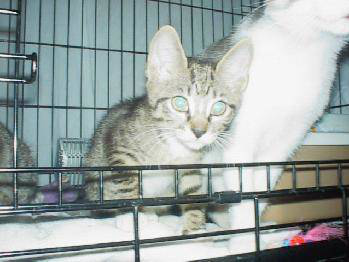

In [35]:
from PIL import Image
Image.open(data_dir  + "/test/" + filenames[0])

In [37]:
save_array(data_dir + "/results/" + "test_preds.dat", preds)
save_array(data_dir + "/results/" + "filenames.dat", filenames)

In [38]:
vgg.model.load_weights(data_dir + "/results/" + latest_weights_fn)

In [45]:
val_batches, probs = vgg.test(data_dir + "/valid/", batch_size=64)

Found 2000 images belonging to 2 classes.


In [47]:
filenames = val_batches.filenames
filenames[:5]

['cats/cat.9649.jpg',
 'cats/cat.9976.jpg',
 'cats/cat.7922.jpg',
 'cats/cat.10746.jpg',
 'cats/cat.6955.jpg']

In [48]:
expected_labels = val_batches.classes
expected_labels[:5]

array([0, 0, 0, 0, 0], dtype=int32)

In [49]:
our_predictions = probs[:, 0]
our_predictions[:5]

array([ 1.,  1.,  1.,  1.,  1.], dtype=float32)

In [50]:
our_labels = np.round(1 - our_predictions)
our_labels[:5]

array([ 0.,  0.,  0.,  0.,  0.], dtype=float32)

In [55]:
from keras.preprocessing import image

def plots_idx(idx, titles=None):
    plots(
        [image.load_img(data_dir + "/valid/" + filenames[i]) for i in idx],
        titles=titles
    )

In [56]:
n_view = 4

1959 correct labels


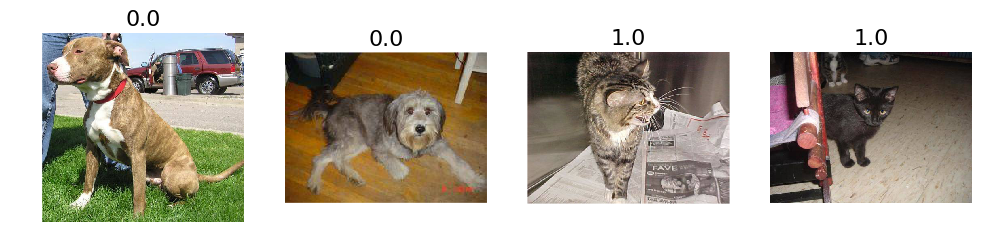

In [57]:
correct = np.where(our_labels==expected_labels)[0]
print("{} correct labels".format(len(correct)))
idx = permutation(correct)[:n_view]
plots_idx(idx, our_predictions[idx])

41 incorrect labels


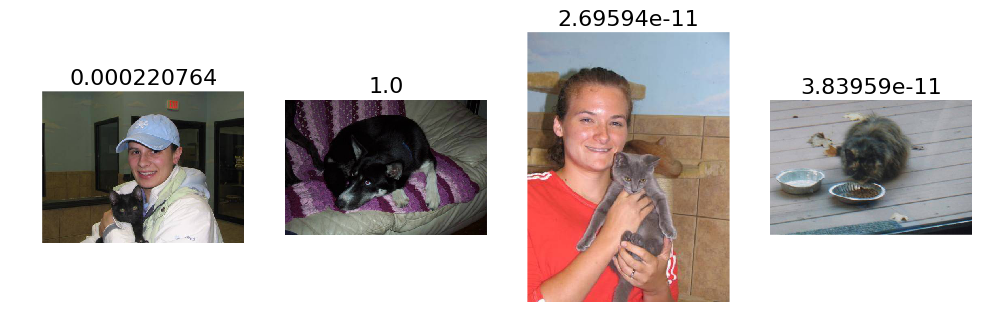

In [58]:
incorrect = np.where(our_labels!=expected_labels)[0]
print("{} incorrect labels".format(len(incorrect)))
idx = permutation(incorrect)[:n_view]
plots_idx(idx, our_predictions[idx])

968 confident correct cats


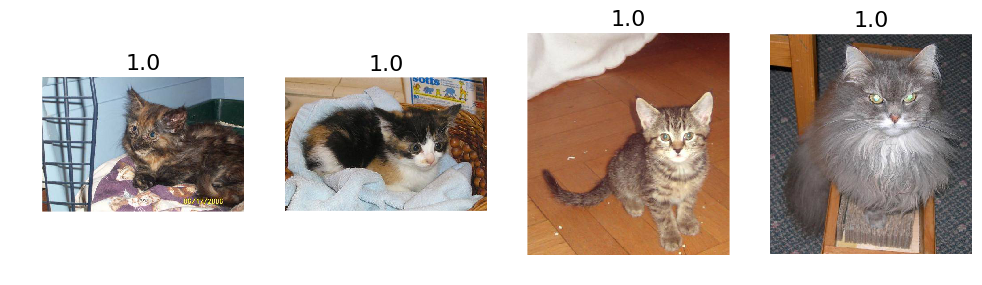

In [59]:
correct_cats = np.where((our_labels==0) & (our_labels==expected_labels))[0]
print("{} confident correct cats".format(len(correct_cats)))
most_correct_cats = np.argsort(our_predictions[correct_cats])[::-1][:n_view]
plots_idx(correct_cats[most_correct_cats], our_predictions[correct_cats][most_correct_cats])

991 confident correct dogs


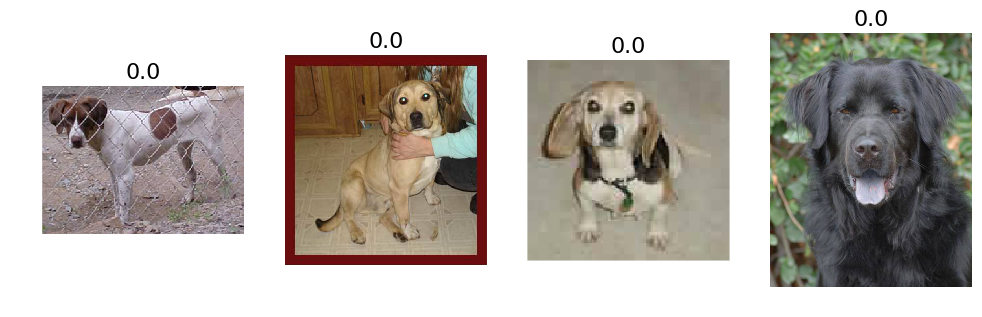

In [61]:
correct_dogs = np.where((our_labels==1) & (our_labels==expected_labels))[0]
print("{} confident correct dogs".format(len(correct_dogs)))
most_correct_dogs = np.argsort(our_predictions[correct_dogs])[:n_view]
plots_idx(correct_dogs[most_correct_dogs], our_predictions[correct_dogs][most_correct_dogs])

30 incorrect cats


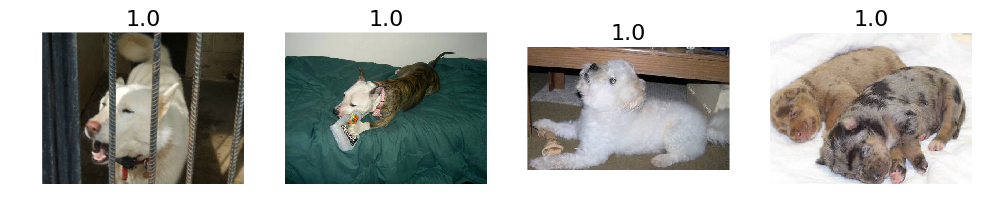

In [63]:
incorrect_cats = np.where((our_labels==0) & (our_labels!=expected_labels))[0]
print("{} incorrect cats".format(len(incorrect_cats)))
if len(incorrect_cats):
    most_incorrect_cats = np.argsort(our_predictions[incorrect_cats])[::-1][:n_view]
    plots_idx(incorrect_cats[most_incorrect_cats], our_predictions[incorrect_cats][most_incorrect_cats])

11 incorrect dogs


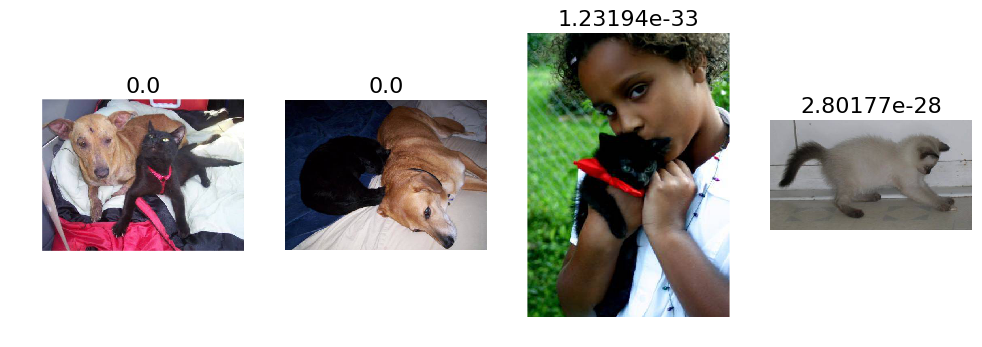

In [65]:
incorrect_dogs = np.where((our_labels==1) & (our_labels!=expected_labels))[0]
print("{} incorrect dogs".format(len(incorrect_dogs)))
if len(incorrect_dogs):
    most_incorrect_dogs = np.argsort(our_predictions[incorrect_dogs])[:n_view]
    plots_idx(incorrect_dogs[most_incorrect_dogs], our_predictions[incorrect_dogs][most_incorrect_dogs])

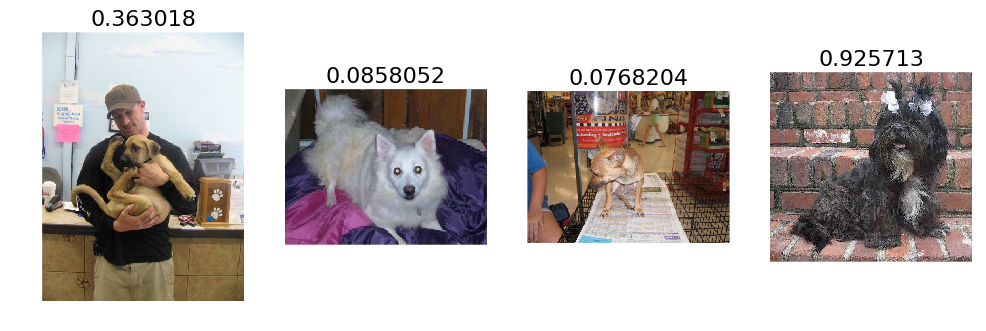

In [68]:
most_uncertain = np.argsort(np.abs(our_predictions-0.5))
plots_idx(most_uncertain[:n_view], our_predictions[most_uncertain])

In [69]:
from sklearn.metrics import confusion_matrix

[[968  11]
 [ 30 991]]


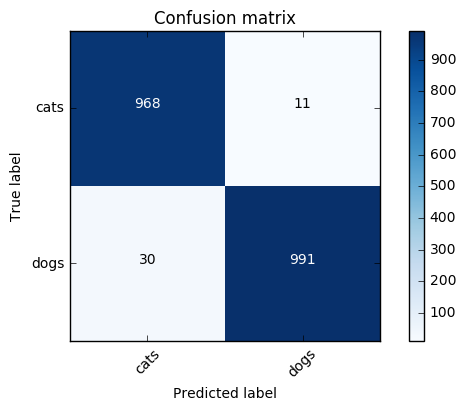

In [70]:
cm = confusion_matrix(expected_labels, our_labels)
plot_confusion_matrix(cm, val_batches.class_indices)

In [71]:
preds = load_array(data_dir + "/results/" + "test_preds.dat")
filenames = load_array(data_dir + "/results/" + "filenames.dat")

In [74]:
isdog = preds[:, 1]
print("Raw preds: {}".format(isdog[:5]))
print("Mid preds: {}".format(isdog[(isdog < .6) & (isdog > .4)]))
print("Edge preds: {}".format(isdog[(isdog == 1) | (isdog == 0)]))

Raw preds: [  0.0000e+00   1.5300e-22   0.0000e+00   0.0000e+00   1.0000e+00]
Mid preds: [ 0.4481  0.5137  0.4865  0.5016]
Edge preds: [ 0.  0.  0. ...,  0.  0.  1.]


In [75]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import log_loss

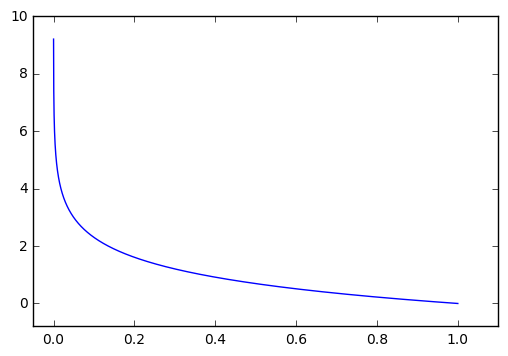

In [77]:
x = [i*.0001 for i in range(1, 10000)]
y = [log_loss([1], [[i * .0001, 1 - (i * .0001)]], eps=1e-15) for i in range(1, 10000, 1)]

plt.plot(x, y)
plt.axis([-0.05, 1.1, -0.8, 10])

plt.show()

In [78]:
isdog = isdog.clip(min=0.05, max=0.95)

In [79]:
filenames = batches.filenames
ids = np.array([int(f[8:f.find(".")]) for f in filenames])

In [80]:
subm = np.stack([ids, isdog], axis=1)
subm[:5]

array([[  9.2920e+03,   5.0000e-02],
       [  1.2026e+04,   5.0000e-02],
       [  9.6880e+03,   5.0000e-02],
       [  4.3920e+03,   5.0000e-02],
       [  7.7900e+02,   9.5000e-01]])

In [81]:
subm_fn = "cd-redux-submission1.csv"
np.savetxt(
    wk_dir + "/" + subm_fn, 
    subm, 
    fmt="%d,%.5f", 
    header="id, label"
)

In [82]:
from IPython.display import FileLink

In [83]:
%cd $wk_dir

/home/ubuntu/courses/deeplearning1/wk


In [84]:
FileLink(subm_fn)

/home/ubuntu/courses/deeplearning1/wk/cd-redux-submission1.csv